In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [4]:
file_name = pd.ExcelFile('World_development_mesurement.xlsx')
print(file_name.sheet_names)

['world_development']


In [5]:
df = pd.read_excel('World_development_mesurement.xlsx',sheet_name='world_development')
df.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [6]:
data = df.copy()
data.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [7]:
data.shape

(2704, 25)

In [8]:
### As the number of columns are large, the type of data is a multi-dimensional one.

In [9]:
Size = data.size
Size

67600

In [10]:
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

### Statistical summary:

In [12]:
data.describe()

Birth Rate  CO2 Emissions  Days to Start Business  Ease of Business  \
count  2585.000000   2.125000e+03             1718.000000        185.000000   
mean      0.022715   1.423071e+05               39.999418         94.875676   
std       0.011338   6.159288e+05               57.318588         54.791906   
min       0.007000   7.000000e+00                1.000000          1.000000   
25%       0.013000   1.360000e+03               13.000000         48.000000   
50%       0.020000   8.529000e+03               26.000000         94.000000   
75%       0.031000   5.910800e+04               45.000000        142.000000   
max       0.053000   8.286892e+06              694.000000        189.000000   

       Energy Usage  Health Exp % GDP  Hours to do Tax  Infant Mortality Rate  \
count  1.785000e+03       2395.000000      1416.000000            2444.000000   
mean   7.723684e+04          0.064170       302.068503               0.032813   
std    2.599239e+05          0.026325       273.299686               0.029968   
min    8.000000e+00          0.008000        12.000000               0.002000   
25%    3.737000e+03          0.046000       156.000000               0.009000   
50%    1.433800e+04          0.061000       239.000000               0.020000   
75%    4.185200e+04          0.079000       344.750000               0.053000   
max    2.727728e+06          0.225000      2600.000000               0.141000   

       Internet Usage  Lending Interest  Life Expectancy Female  \
count     2531.000000       1880.000000             2568.000000   
mean         0.239747          0.148103               71.159268   
std          0.260132          0.171829               10.708262   
min          0.000000          0.005000               39.000000   
25%          0.000000          0.080000               64.000000   
50%          0.100000          0.120000               75.000000   
75%          0.400000          0.173000               79.000000   
max          1.000000          4.965000               87.000000   

       Life Expectancy Male  Mobile Phone Usage  Number of Records  \
count           2568.000000         2537.000000             2704.0   
mean              66.461838            0.578124                1.0   
std                9.390217            0.474647                0.0   
min               37.000000            0.000000                1.0   
25%               61.000000            0.100000                1.0   
50%               69.000000            0.500000                1.0   
75%               73.250000            0.900000                1.0   
max               88.000000            2.900000                1.0   

       Population 0-14  Population 15-64  Population 65+  Population Total  \
count      2484.000000       2484.000000     2484.000000      2.704000e+03   
mean          0.303051          0.623481        0.073465      3.145729e+07   
std           0.106577          0.069660        0.049541      1.242894e+08   
min           0.118000          0.474000        0.003000      1.887600e+04   
25%           0.204750          0.559000        0.033000      8.783360e+05   
50%           0.299500          0.642500        0.052000      5.800324e+06   
75%           0.402000          0.676000        0.112000      2.014089e+07   
max           0.500000          0.858000        0.244000      1.350695e+09   

       Population Urban  
count       2678.000000  
mean           0.562953  
std            0.245897  
min            0.082000  
25%            0.356000  
50%            0.560000  
75%            0.765000  
max            1.000000

In [13]:
### numerical columns:

num_col = [i for i in data.columns if data[i].dtypes!='O']
print(num_col)

['Birth Rate', 'CO2 Emissions', 'Days to Start Business', 'Ease of Business', 'Energy Usage', 'Health Exp % GDP', 'Hours to do Tax', 'Infant Mortality Rate', 'Internet Usage', 'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage', 'Number of Records', 'Population 0-14', 'Population 15-64', 'Population 65+', 'Population Total', 'Population Urban']


In [14]:
### categorical columns:

cat_col = [i for i in data.columns if data[i].dtypes=='O']
print(cat_col)

['Business Tax Rate', 'Country', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']


### Checking for null values and replacing with mode and median values through SimpleImputer

In [15]:
print(data.isnull().sum())
missing_values = data.isnull().sum().sum()
missing_values

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64


np.int64(11740)

In [16]:
Total_missing_values = (missing_values/Size)*100
Total_missing_values

np.float64(17.366863905325445)

In [17]:
### If the value of missing values is less than 5%, it has to be removed. While to have a good model, as of now i am not going to remove the columns, rather than 
###    i am going to replace the NaN values with median values and mode values.
### Also, if it is more than that we have to replace it based on the data type of the columns. Here, we have 19 numerical columns, 6 categorical columns out of 25 columns.

In [18]:
###  The overall percentage of missing values is greater than 5% that is 17.36%. So, i am going to replace the columns which contain missing values with the median values for numerical columns and mode values for  categorical columns.

In [19]:
sim_imp1 = SimpleImputer(missing_values=np.nan, strategy='median')
sim_imp2 = SimpleImputer(strategy='most_frequent')

In [20]:
data[num_col] = sim_imp1.fit_transform(data[num_col])

In [21]:
data[cat_col] = sim_imp2.fit_transform(data[cat_col])

In [22]:
data.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

### checking for duplicated values

In [23]:
data.duplicated().sum()

np.int64(0)

### outlier detection

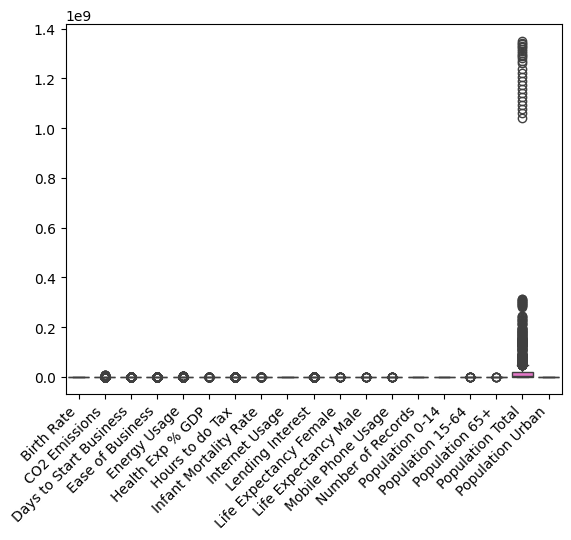

In [24]:
sns.boxplot(data)
plt.xticks(rotation=45,ha='right')
plt.show()

In [25]:
def outlier_capping(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    Lower_bound = Q1-1.5*IQR
    Upper_bound = Q3+1.5*IQR
    data[column] = data[column].apply (lambda x: Lower_bound if x<Lower_bound else Upper_bound if x>Upper_bound else x)
for col in data.select_dtypes(['int','float']).columns:
    outlier_capping(data,col)  

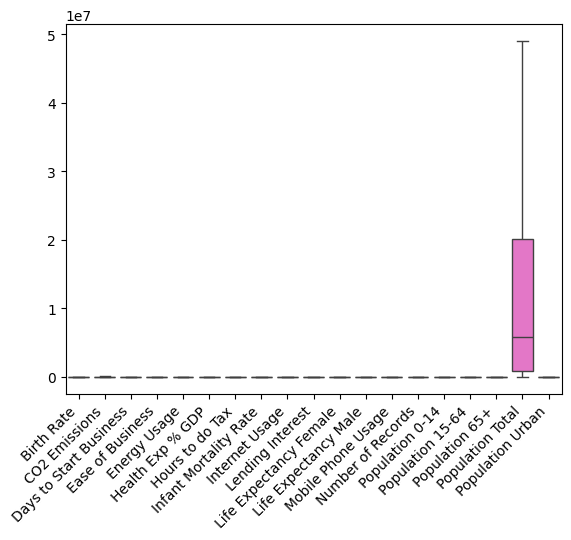

In [26]:
sns.boxplot(data)
plt.xticks(rotation=45,ha='right')
plt.show()

In [27]:
data.to_csv('file.csv',index=False)

### Feature Engineering

###  1) Encoding Techniques:

In [28]:
data[cat_col].head()

Business Tax Rate       Country              GDP Health Exp/Capita  \
0             44.1%       Algeria  $54,790,058,957               $60   
1             44.1%        Angola   $9,129,594,819               $22   
2             44.1%         Benin   $2,359,122,303               $15   
3             44.1%      Botswana   $5,788,311,645              $152   
4             44.1%  Burkina Faso   $2,610,959,139               $12   

  Tourism Inbound Tourism Outbound  
0    $102,000,000     $193,000,000  
1     $34,000,000     $146,000,000  
2     $77,000,000      $50,000,000  
3    $227,000,000     $209,000,000  
4     $23,000,000      $30,000,000

In [29]:
data['Country'].value_counts()

Country
Algeria                     13
Angola                      13
Benin                       13
Botswana                    13
Burkina Faso                13
                            ..
Turks and Caicos Islands    13
United States               13
Uruguay                     13
Venezuela, RB               13
Virgin Islands (U.S.)       13
Name: count, Length: 208, dtype: int64

In [30]:
print(data['Country'].unique())

['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Djibouti' 'Egypt, Arab Rep.'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia, The' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan'
 'Armenia' 'Azerbaijan' 'Bangladesh' 'Bhutan' 'Brunei Darussalam'
 'Cambodia' 'China' 'Georgia' 'Hong Kong SAR, China' 'India' 'Indonesia'
 'Japan' 'Kazakhstan' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kyrgyz Republic'
 'Lao PDR' 'Macao SAR, China' 'Malaysia' 'Maldives' 'Mongolia' 'Myanmar'
 'Nepal' 'Pakistan' 'Philippines' 'Singapore' 'Sri Lanka' 'Tajikistan'


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
data['Country'] = le.fit_transform(data['Country'])
data['Business Tax Rate'] = data['Business Tax Rate'].replace('[\%]','',regex=True).astype(float)
data[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']] = data[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']].replace('[\$,]','',regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Suresh\AppData\Local\Temp\ipykernel_3564\2364169741.py:3: SyntaxWarning: invalid escape sequence '\%'
  data['Business Tax Rate'] = data['Business Tax Rate'].replace('[\%]','',regex=True).astype(float)
C:\Users\Suresh\AppData\Local\Temp\ipykernel_3564\2364169741.py:4: SyntaxWarning: invalid escape sequence '\$'
  data[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']] = data[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']].replace('[\$,]','',regex=True).astype(float)


In [33]:
data.head()

Birth Rate  Business Tax Rate  CO2 Emissions  Country  \
0       0.020               44.1        87931.0        2   
1       0.050               44.1         9542.0        5   
2       0.043               44.1         1617.0       20   
3       0.027               44.1         4276.0       25   
4       0.046               44.1         1041.0       29   

   Days to Start Business  Ease of Business  Energy Usage           GDP  \
0                    26.0              94.0       26998.0  5.479006e+10   
1                    26.0              94.0        7499.0  9.129595e+09   
2                    26.0              94.0        1983.0  2.359122e+09   
3                    26.0              94.0        1836.0  5.788312e+09   
4                    26.0              94.0       14338.0  2.610959e+09   

   Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               60.0  ...                  67.0   
1             0.034               22.0  ...                  44.0   
2             0.043               15.0  ...                  53.0   
3             0.047              152.0  ...                  49.0   
4             0.051               12.0  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                1.0            0.342             0.619   
1                 0.0                1.0            0.476             0.499   
2                 0.0                1.0            0.454             0.517   
3                 0.1                1.0            0.383             0.587   
4                 0.0                1.0            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039        31719449.0             0.599      102000000.0   
1           0.025        13924930.0             0.324       34000000.0   
2           0.029         6949366.0             0.383       77000000.0   
3           0.029         1755375.0             0.532      227000000.0   
4           0.028        11607944.0             0.178       23000000.0   

   Tourism Outbound  
0       193000000.0  
1       146000000.0  
2        50000000.0  
3       209000000.0  
4        30000000.0  

[5 rows x 25 columns]

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
c = [b for b in data.columns if data[b].dtypes=='O']
c

[]

### 2) Standardization or feature scaling

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
rob_sca = RobustScaler()

In [38]:
data_Scaled = pd.DataFrame(rob_sca.fit_transform(data),columns=data.columns)
data_Scaled.head()

Birth Rate  Business Tax Rate  CO2 Emissions   Country  \
0    0.000000                0.0       1.969051 -0.980676   
1    1.764706                0.0       0.025121 -0.951691   
2    1.352941                0.0      -0.171407 -0.806763   
3    0.411765                0.0      -0.105468 -0.758454   
4    1.529412                0.0      -0.185691 -0.719807   

   Days to Start Business  Ease of Business  Energy Usage       GDP  \
0                     0.0               0.0      0.810253  0.480611   
1                     0.0               0.0     -0.437703 -0.032467   
2                     0.0               0.0     -0.790733 -0.108546   
3                     0.0               0.0     -0.800141 -0.070013   
4                     0.0               0.0      0.000000 -0.105716   

   Health Exp % GDP  Health Exp/Capita  ...  Life Expectancy Male  \
0         -0.928571          -0.160535  ...             -0.166667   
1         -0.964286          -0.233158  ...             -2.083333   
2         -0.642857          -0.246536  ...             -1.333333   
3         -0.500000           0.015289  ...             -1.666667   
4         -0.357143          -0.252269  ...             -1.666667   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0           -0.714286                0.0         0.229730         -0.217593   
1           -0.714286                0.0         0.954054         -1.328704   
2           -0.714286                0.0         0.835135         -1.162037   
3           -0.571429                0.0         0.451351         -0.513889   
4           -0.714286                0.0         0.910811         -1.273148   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0       -0.183099          1.345570          0.096237        -0.131640   
1       -0.380282          0.421782         -0.582357        -0.157814   
2       -0.323944          0.059652         -0.436767        -0.141263   
3       -0.323944         -0.209990         -0.069093        -0.083526   
4       -0.338028          0.301498         -0.942628        -0.162048   

   Tourism Outbound  
0         -0.040047  
1         -0.067932  
2         -0.124889  
3         -0.030555  
4         -0.136755  

[5 rows x 25 columns]

### Visualizations

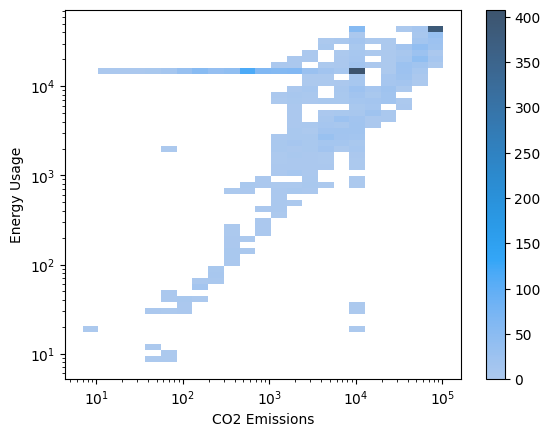

In [39]:
sns.histplot(data,x='CO2 Emissions',y='Energy Usage',cbar=True, log_scale=True)
plt.show()

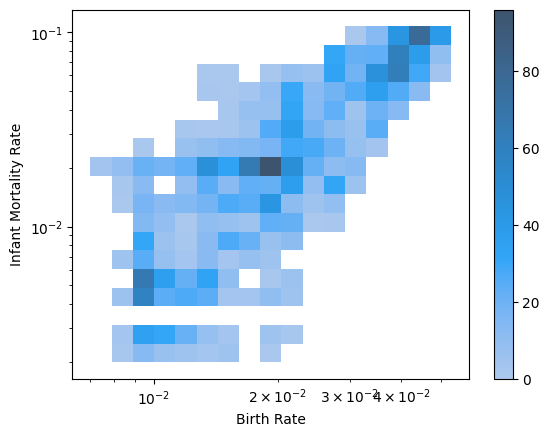

In [40]:
sns.histplot(data, x='Birth Rate', y='Infant Mortality Rate', kde=True, cbar=True, multiple='dodge',log_scale=True)
plt.show()

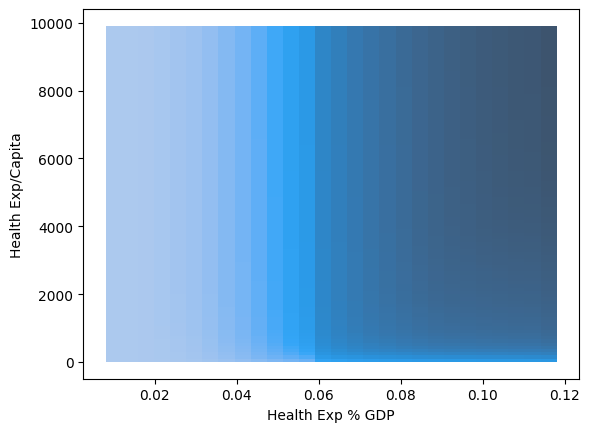

In [41]:
sns.histplot(data, x='Health Exp % GDP', y='Health Exp/Capita',element='step',fill=True,cumulative='True',stat='density',common_norm=False)
plt.show()

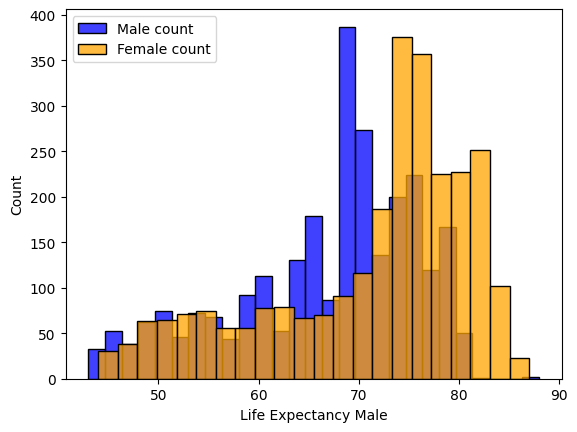

In [42]:
sns.histplot(data['Life Expectancy Male'],color='blue',label='Male count')
sns.histplot(data['Life Expectancy Female'],color='orange',label='Female count')
plt.legend()
plt.show()

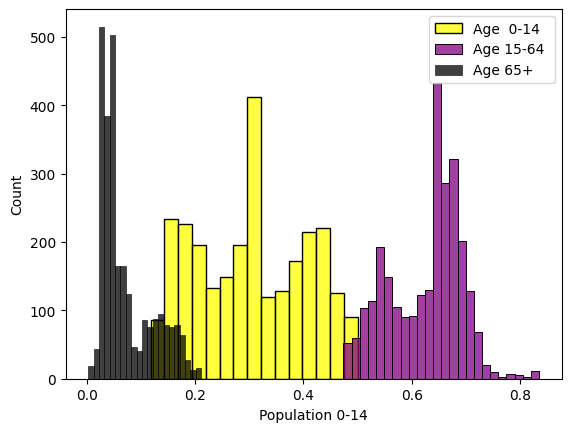

In [43]:
sns.histplot(data['Population 0-14'],color='yellow',label='Age  0-14')
sns.histplot(data['Population 15-64'],color='purple',label='Age 15-64 ')
sns.histplot(data['Population 65+'],color='black',label='Age 65+')
plt.legend()
plt.show()

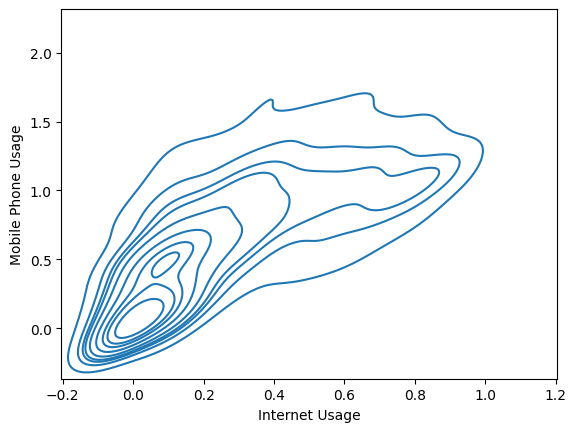

In [44]:
sns.kdeplot(data, x="Internet Usage", y= "Mobile Phone Usage")
plt.show()

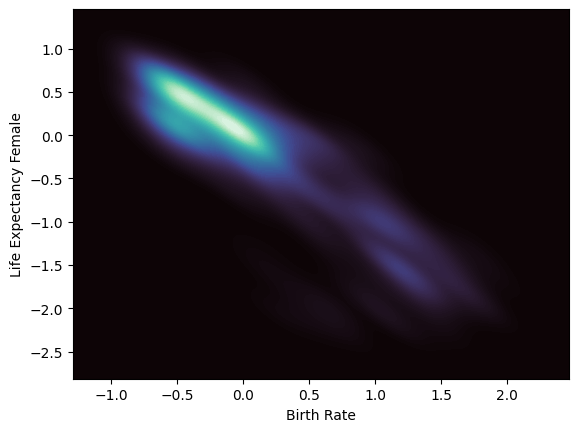

In [45]:
sns.kdeplot(data=data_Scaled, x="Birth Rate", y="Life Expectancy Female",fill=True, thresh=0, levels=100, cmap="mako")
plt.show()

In [46]:
column_sum = data.sum()
column_sum

Birth Rate                6.109800e+01
Business Tax Rate         1.261720e+05
CO2 Emissions             7.382142e+07
Country                   2.798640e+05
Days to Start Business    7.609050e+04
Ease of Business          2.541760e+05
Energy Usage              4.939690e+07
GDP                       6.582624e+14
Health Exp % GDP          1.704330e+02
Health Exp/Capita         1.923981e+06
Hours to do Tax           6.507790e+05
Infant Mortality Rate     8.491750e+01
Internet Usage            6.241000e+02
Lending Interest          3.403405e+02
Life Expectancy Female    1.929670e+05
Life Expectancy Male      1.800840e+05
Mobile Phone Usage        1.547550e+03
Number of Records         2.704000e+03
Population 0-14           8.186690e+02
Population 15-64          1.689916e+03
Population 65+            1.938335e+02
Population Total          3.669611e+10
Population Urban          1.522147e+03
Tourism Inbound           1.154782e+13
Tourism Outbound          1.056460e+13
dtype: float64

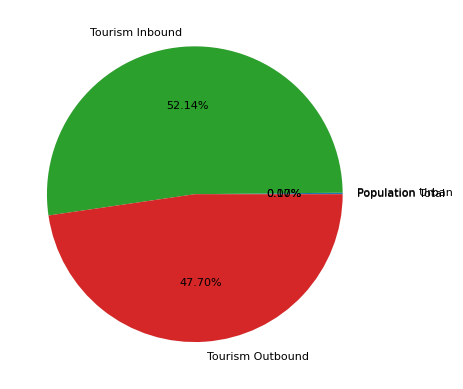

In [47]:
plt.pie(column_sum[21:25],labels=column_sum.index[21:25],autopct='%.2f%%',textprops={'color':'black' , 'size':8},wedgeprops={'linewidth':0.01,'edgecolor':'black'})
plt.show()

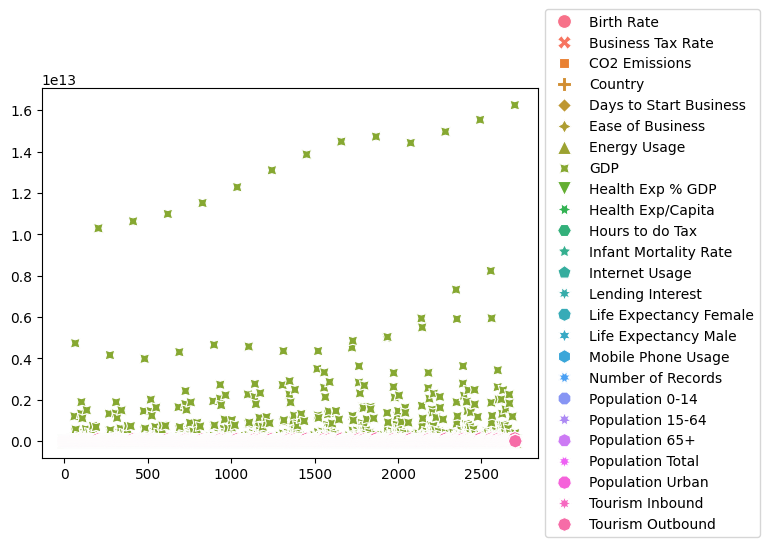

In [48]:
sns.scatterplot(data,s=100,color='.3')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

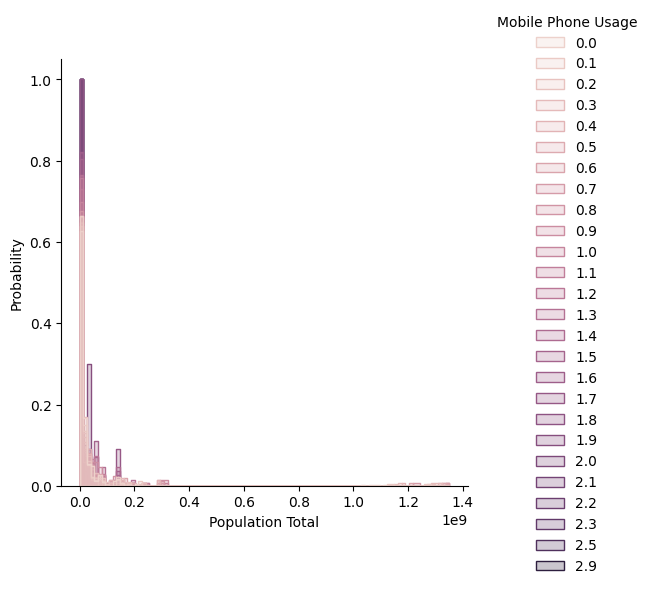

In [49]:
sns.displot(df,x='Population Total',hue='Mobile Phone Usage',element='step',stat='probability',common_norm=False)
plt.show()

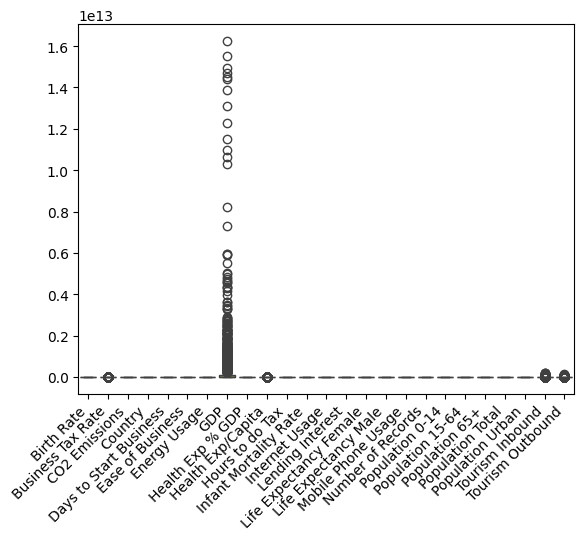

In [50]:
sns.boxplot(data)
plt.xticks(rotation=45,ha='right')
plt.show()

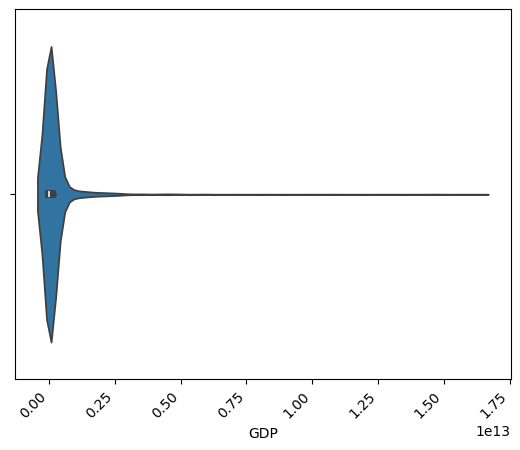

In [51]:
sns.violinplot(data,x='GDP')
plt.xticks(rotation=45,ha='right')
plt.show()

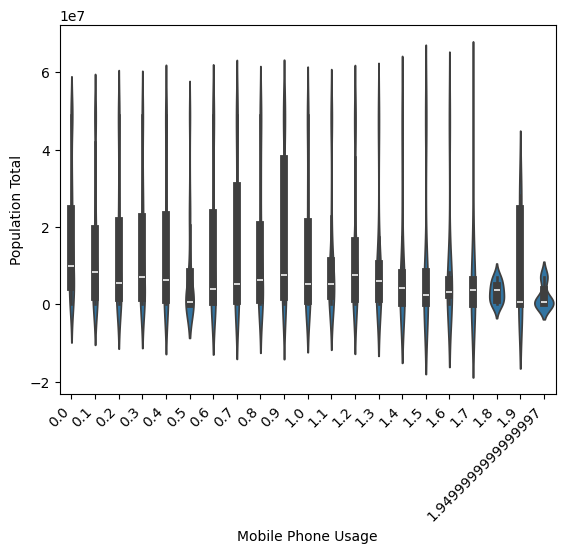

In [52]:
sns.violinplot(data,y='Population Total',x='Mobile Phone Usage' )
plt.xticks(rotation=45,ha='right')
plt.show()

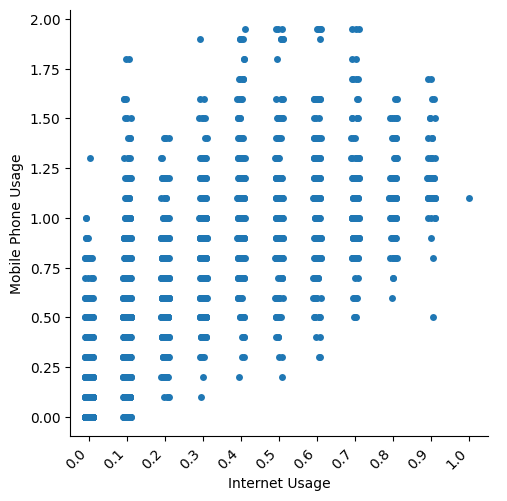

In [53]:
sns.catplot(data,x='Internet Usage',y='Mobile Phone Usage' )
plt.xticks(rotation=45,ha='right')
plt.show()

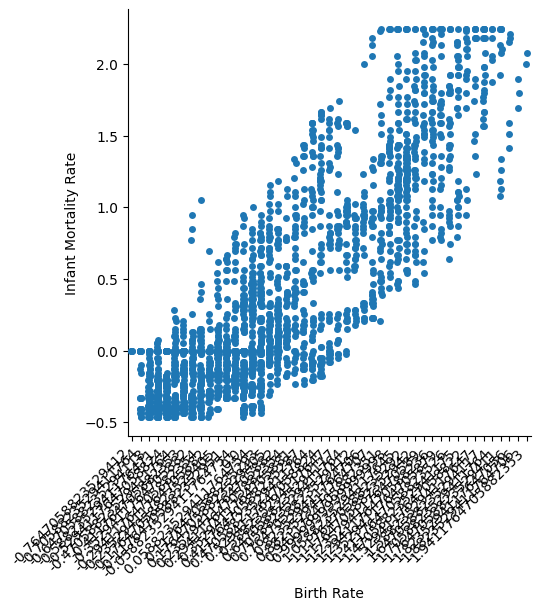

In [54]:
sns.catplot(data_Scaled,x='Birth Rate',y='Infant Mortality Rate')
plt.xticks(rotation=45,ha='right')
plt.show()

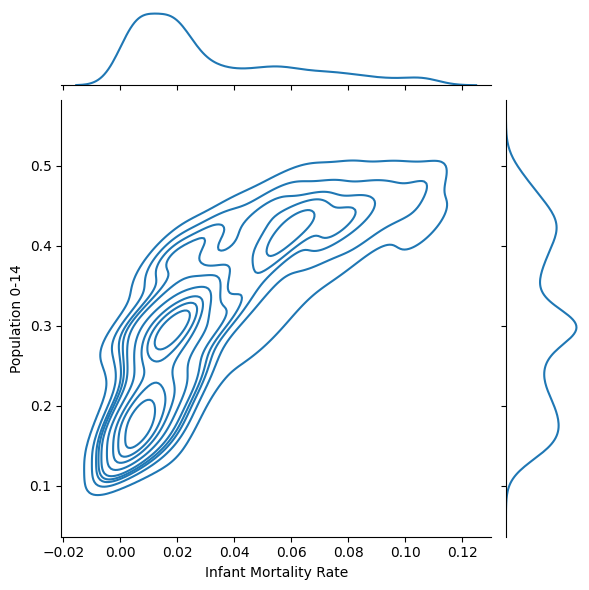

In [55]:
sns.jointplot(data=data,x='Infant Mortality Rate',y='Population 0-14',kind='kde')
plt.show()

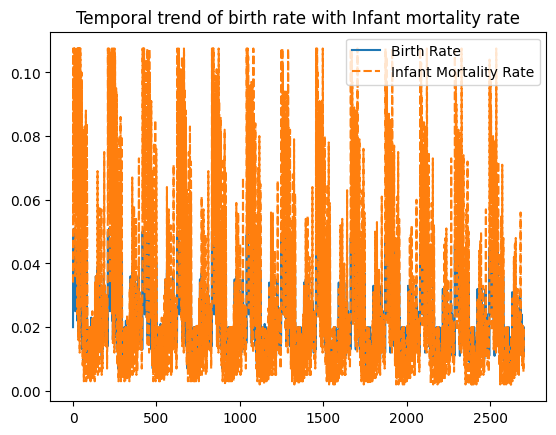

In [56]:
sns.lineplot(data=data[['Birth Rate' , 'Infant Mortality Rate']])
plt.title('Temporal trend of birth rate with Infant mortality rate')
plt.show()

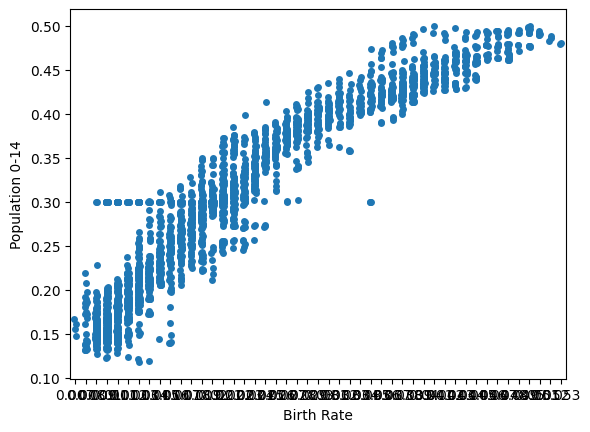

In [57]:
sns.stripplot(data,x='Birth Rate',y='Population 0-14')
plt.show()

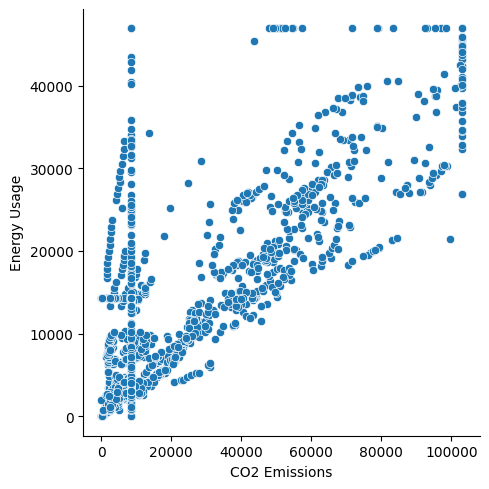

In [58]:
sns.relplot(data, x='CO2 Emissions',y='Energy Usage')
plt.show()

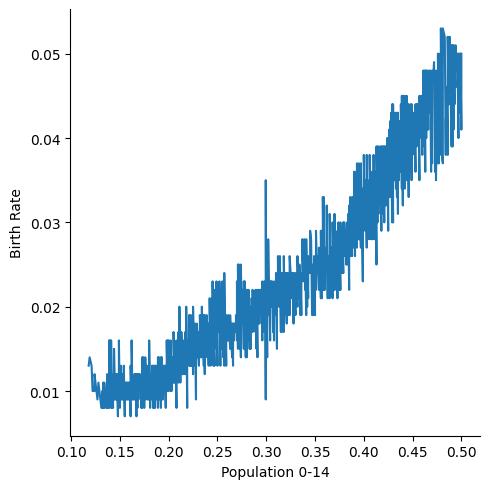

In [59]:
sns.relplot(data=data, x='Population 0-14',y='Birth Rate',kind='line',estimator=None)
plt.show()

### Checking for low variance columns and dropping them.

In [60]:
data_Scaled.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [61]:
low_var_cols = [col for col in data_Scaled.columns if data_Scaled[col].nunique() <=1]
low_var_cols

['Ease of Business', 'Number of Records']

In [62]:
data_Scaled.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [63]:
DATA = data_Scaled.drop(low_var_cols,axis=1)
DATA

Birth Rate  Business Tax Rate  CO2 Emissions   Country  \
0       0.000000           0.000000       1.969051 -0.980676   
1       1.764706           0.000000       0.025121 -0.951691   
2       1.352941           0.000000      -0.171407 -0.806763   
3       0.411765           0.000000      -0.105468 -0.758454   
4       1.529412           0.000000      -0.185691 -0.719807   
...          ...                ...            ...       ...   
2699    0.000000           0.000000       0.000000  0.864734   
2700   -0.411765           0.621622       0.000000  0.913043   
2701   -0.294118          -0.594595       0.000000  0.922705   
2702    0.000000           4.810811       0.000000  0.951691   
2703   -0.529412           0.000000       0.000000  0.971014   

      Days to Start Business  Energy Usage         GDP  Health Exp % GDP  \
0                   0.000000      0.810253    0.480611         -0.928571   
1                   0.000000     -0.437703   -0.032467         -0.964286   
2                   0.000000     -0.790733   -0.108546         -0.642857   
3                   0.000000     -0.800141   -0.070013         -0.500000   
4                   0.000000      0.000000   -0.105716         -0.357143   
...                      ...           ...         ...               ...   
2699                0.000000      0.000000   -0.123796          0.000000   
2700               -1.473684      2.084873  182.402386          2.035714   
2701               -1.333333      0.000000    0.426835          1.000000   
2702                2.078947      0.000000    4.149385         -0.535714   
2703                0.000000      0.000000   -0.123796          0.000000   

      Health Exp/Capita  Hours to do Tax  ...  Life Expectancy Female  \
0             -0.160535         0.000000  ...               -0.285714   
1             -0.233158         0.000000  ...               -2.000000   
2             -0.246536         0.000000  ...               -1.285714   
3              0.015289         0.000000  ...               -1.642857   
4             -0.252269         0.000000  ...               -1.642857   
...                 ...              ...  ...                     ...   
2699          -0.246536         0.000000  ...                0.000000   
2700          16.724319        -1.858491  ...                0.428571   
2701           2.224558         2.141509  ...                0.357143   
2702           0.858098         2.141509  ...                0.214286   
2703          -0.246536         0.000000  ...                0.571429   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                -0.166667           -0.714286         0.229730   
1                -2.083333           -0.714286         0.954054   
2                -1.333333           -0.714286         0.835135   
3                -1.666667           -0.571429         0.451351   
4                -1.666667           -0.714286         0.910811   
...                    ...                 ...              ...   
2699              0.000000            0.000000         0.000000   
2700              0.583333            0.714286        -0.559459   
2701              0.416667            1.428571        -0.429730   
2702              0.250000            0.714286        -0.062162   
2703              0.583333            0.000000        -0.505405   

      Population 15-64  Population 65+  Population Total  Population Urban  \
0            -0.217593       -0.183099          1.345570          0.096237   
1            -1.328704       -0.380282          0.421782         -0.582357   
2            -1.162037       -0.323944          0.059652         -0.436767   
3            -0.513889       -0.323944         -0.209990         -0.069093   
4            -1.273148       -0.338028          0.301498         -0.942628   
...                ...             ...               ...               ...   
2699          0.000000        0.000000         -0.299436          0.866132   
2700          0.22

In [64]:
country_names = DATA['Country']
x = DATA.drop('Country',axis=1)

In [65]:
DATA.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Energy Usage', 'GDP', 'Health Exp % GDP',
       'Health Exp/Capita', 'Hours to do Tax', 'Infant Mortality Rate',
       'Internet Usage', 'Lending Interest', 'Life Expectancy Female',
       'Life Expectancy Male', 'Mobile Phone Usage', 'Population 0-14',
       'Population 15-64', 'Population 65+', 'Population Total',
       'Population Urban', 'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

### Dimensionality Reduction Techniques

### 1) PCA

In [66]:
#### PCA is not feature selection like SelectKBest. PCA is feature transformation — it creates new features (principal components) that are combinations of the original features.
### PCA compressing your dataset while retaining as much variance (information) as possible.

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA()

In [69]:
pca.fit(x)

PCA()

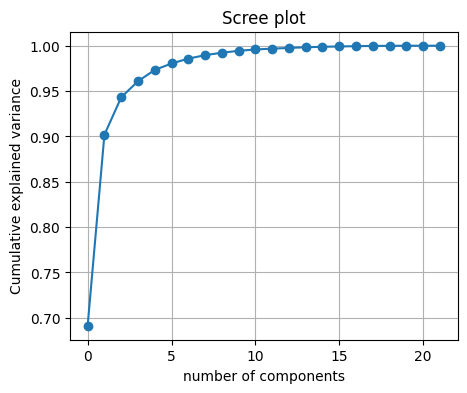

In [70]:
### choosing number of components through scree plot

plt.figure(figsize=(5,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel('number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree plot')
plt.grid('on')
plt.show()

In [71]:
### from the above plot we can see that the curve starts to rise and flattens from 5th component, so the first five components gives most of the meaningful information
### we can have number of components as 5 (0.95%). The elbow point or knee point is at around 5-6. After that, the increase is very small (i.e flattens)

In [72]:
pca_cal = PCA(n_components=5)

In [73]:
pca_data = pca_cal.fit_transform(x)

In [74]:
pca_data.shape   ## pca dataframe dimension

(2704, 5)

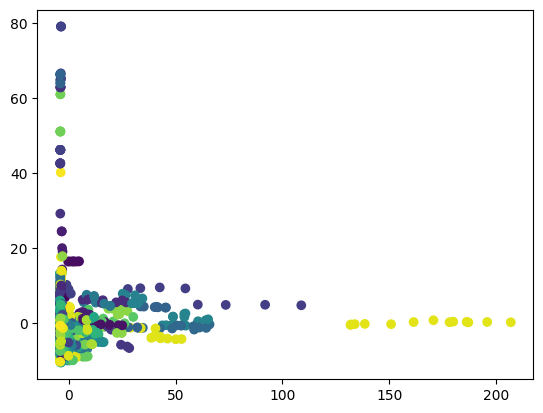

In [75]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=country_names)
plt.show()

Text(0.5, 0.92, '3D PCA Scatter Plot')

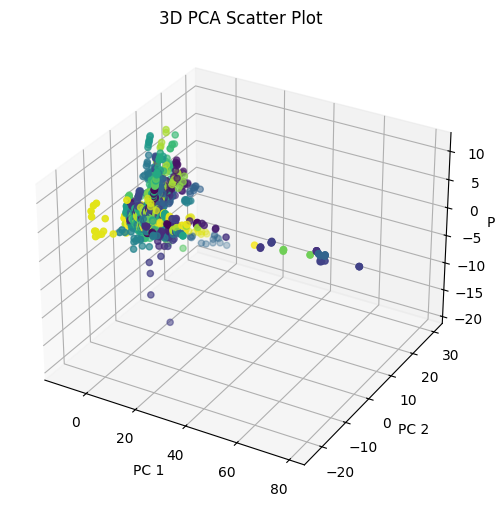

In [76]:
### as our number of component is 5, we cannot plot it directly. so we are taking 3D plot and passing any 3 components using a 3D plot.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 1], pca_data[:, 2], pca_data[:, 3], c=country_names, marker='o')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PCA Scatter Plot')

In [77]:
data_Scaled.shape  ## before pca dataframe dimension

(2704, 25)

### 2) t-SNE (t-distributed Stochastic Neighbor Embedding)

In [78]:
from sklearn.manifold import TSNE    

In [79]:
tsne = TSNE(n_components=2, perplexity=30, random_state=50)

In [80]:
tsne_data = tsne.fit_transform(x)
tsne_data

array([[ 11.277381 ,  -8.411283 ],
       [-60.835262 ,   5.9223766],
       [-48.88544  ,  -2.5638459],
       ...,
       [ -0.944408 , -11.075571 ],
       [ 27.121502 ,  -2.026442 ],
       [ 11.252323 ,  29.920639 ]], shape=(2704, 2), dtype=float32)

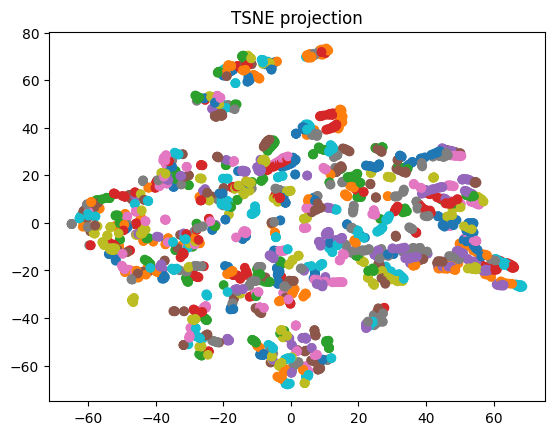

In [81]:
### visualization

plt.scatter(tsne_data[:,0],tsne_data[:,1], c=country_names, cmap='tab10')
plt.title('TSNE projection')
plt.show()

In [82]:
###  converts high dimensional data into 2D or 3D visulaizations, preserves local structure. But, not used for  model input - only visulaization is possible.

### Implementation of Clustering models:

In [83]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [84]:
### 1) KMeans clustering

In [85]:
kmeans = KMeans(n_clusters=4)

In [86]:
cluster = kmeans.fit(x)

In [87]:
###  

x['cluster'] = cluster.labels_

In [88]:
x[x.cluster==1]

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.000000           0.000000       1.969051                0.000000   
1       1.764706           0.000000       0.025121                0.000000   
2       1.352941           0.000000      -0.171407                0.000000   
3       0.411765           0.000000      -0.105468                0.000000   
4       1.529412           0.000000      -0.185691                0.000000   
...          ...                ...            ...                     ...   
2698   -0.294118          -4.054054       0.000000                1.052632   
2699    0.000000           0.000000       0.000000                0.000000   
2701   -0.294118          -0.594595       0.000000               -1.333333   
2702    0.000000           4.810811       0.000000                2.078947   
2703   -0.529412           0.000000       0.000000                0.000000   

      Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0         0.810253  0.480611         -0.928571          -0.160535   
1        -0.437703 -0.032467         -0.964286          -0.233158   
2        -0.790733 -0.108546         -0.642857          -0.246536   
3        -0.800141 -0.070013         -0.500000           0.015289   
4         0.000000 -0.105716         -0.357143          -0.252269   
...            ...       ...               ...                ...   
2698      0.000000  0.128295         -0.250000           1.582418   
2699      0.000000 -0.123796          0.000000          -0.246536   
2701      0.000000  0.426835          1.000000           2.224558   
2702      0.000000  4.149385         -0.535714           0.858098   
2703      0.000000 -0.123796          0.000000          -0.246536   

      Hours to do Tax  Infant Mortality Rate  ...  Life Expectancy Male  \
0            0.000000               0.358974  ...             -0.166667   
1            0.000000               2.243590  ...             -2.083333   
2            0.000000               1.794872  ...             -1.333333   
3            0.000000               0.871795  ...             -1.666667   
4            0.000000               1.948718  ...             -1.666667   
...               ...                    ...  ...                   ...   
2698        -1.094340               0.000000  ...             -0.250000   
2699         0.000000               0.000000  ...              0.000000   
2701         2.141509              -0.256410  ...              0.416667   
2702         2.141509              -0.179487  ...              0.250000   
2703         0.000000               0.000000  ...              0.583333   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0              -0.714286         0.229730         -0.217593       -0.183099   
1              -0.714286         0.954054         -1.328704       -0.380282   
2              -0.714286         0.835135         -1.162037       -0.323944   
3              -0.571429         0.451351         -0.513889       -0.323944   
4              -0.714286         0.910811         -1.273148       -0.338028   
...                  ...              ...               ...             ...   
2698            1.285714        -0.500000          0.578704        0.507042   
2699            0.000000         0.000000          0.000000        0.000000   
2701            1.428571        -0.429730         -0.032407        1.239437   
2702            0.714286        -0.062162          0.087963        0.112676   
2703            0.000000        -0.505405         -0.013889        1.408451   

      Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0             1.345570          0.096237        -0.131640         -0.040047   
1             0.421782         -0.582357        -0.157814         -0.067932   
2             0.059652         -0.436767        -0.141263         -0.124889   
3            -0.209990         -0.069093        -0.083526         -0.03055

In [89]:
silhouette_score(x,cluster.labels_)

0.7925726609736902

In [90]:
cluster.cluster_centers_

array([[-5.15606242e-01,  2.12327634e+00,  1.79385288e+00,
        -2.57160759e-01,  2.02105070e+00,  2.89870928e+01,
         1.01348397e+00,  5.50449019e+00, -2.25259915e-02,
        -3.47985348e-01,  1.17091837e+00, -8.60412126e-01,
         5.09475219e-01,  6.25000000e-01,  6.44314869e-01,
        -7.14837286e-01,  2.71164021e-01,  1.52148606e+00,
         2.11617432e+00,  4.64112604e-01,  1.35784905e+01,
         2.64057295e+01],
       [ 1.63275663e-01, -2.96491786e-01,  4.17119886e-01,
         1.71420709e-01,  1.79375231e-01,  8.46932178e-01,
         2.52521008e-02,  8.75645616e-01,  5.51646319e-02,
         2.99984917e-01,  2.97549020e-01,  1.42132115e-01,
        -2.71820728e-01, -2.14313725e-01,  8.87675070e-02,
         3.66634870e-02, -1.67447349e-01,  2.35476388e-01,
         3.28188231e-01, -4.77749150e-03,  7.58992166e-01,
         9.46585443e-01],
       [-3.73949580e-01,  7.33590734e-01,  1.84168896e+00,
        -9.92481203e-01,  1.93595383e+00,  1.45319309e+02,
    

In [91]:
kmeans.inertia_

171056.81692209194

In [92]:
inertia=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

In [93]:
print(inertia)

[837589.2777226506, 473685.4482819312, 322833.20252343285, 171069.29225711073, 138116.0815777755, 122084.45311155615, 107758.31949254696, 96176.54590188172, 97408.58215815229, 89141.69734600437]


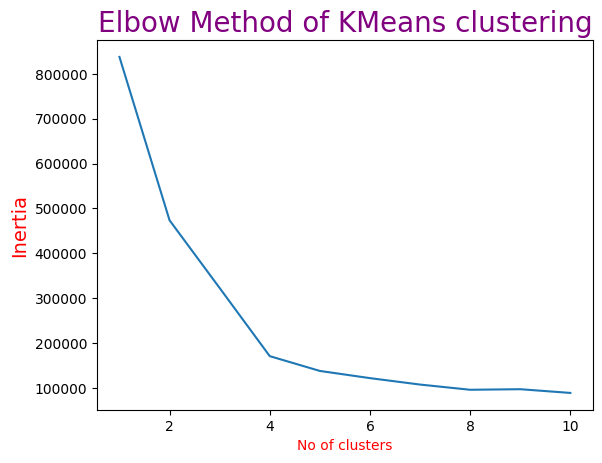

In [94]:
plt.plot(range(1,11),inertia)
plt.xlabel('No of clusters', color='red', size=10)
plt.ylabel('Inertia',color='red',size=14)
plt.title('Elbow Method of KMeans clustering', size=20, color='purple')
plt.show()

In [95]:
### from the above elbow method, we have first decreasing point as 2, the best number of clusters are 2, we will now proceed to find the silhouette_score and the inertia_ values.

In [96]:
kmeans = KMeans(n_clusters=2)

In [97]:
cluster_elbow = kmeans.fit(x)

In [98]:
x['cluster_elbow'] = cluster_elbow.labels_

In [99]:
silhouette_score(x,cluster_elbow.labels_)

0.921628972895116

In [100]:
kmeans.inertia_

460975.501096428

In [101]:
### we now see that the score has been increased now. That's why we go for elbow method.

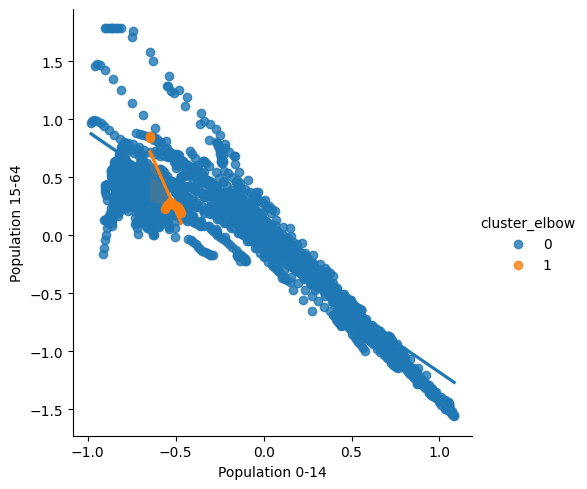

In [102]:
sns.lmplot(data=x,x='Population 0-14',y='Population 15-64',hue='cluster_elbow')
plt.show()

In [103]:
cluster_profile = x.groupby('cluster_elbow').mean(numeric_only=True)
cluster_profile

Birth Rate  Business Tax Rate  CO2 Emissions  \
cluster_elbow                                                 
0                0.155645           0.690320       0.458521   
1               -0.380392           1.034234       1.718910   

               Days to Start Business  Energy Usage         GDP  \
cluster_elbow                                                     
0                            0.155866      0.242078    1.827806   
1                           -0.870175      1.945882  141.107330   

               Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
cluster_elbow                                                         
0                      0.063287           1.027415         0.062947   
1                      1.723810          11.340914         0.094340   

               Infant Mortality Rate  ...  Life Expectancy Male  \
cluster_elbow                         ...                         
0                           0.295844  ...             -0.203979   
1                          -0.321368  ...              0.500000   

               Mobile Phone Usage  Population 0-14  Population 15-64  \
cluster_elbow                                                          
0                        0.102136         0.020704         -0.165064   
1                        0.314286        -0.532793          0.328704   

               Population 65+  Population Total  Population Urban  \
cluster_elbow                                                       
0                    0.273365          0.393141          0.004469   
1                    0.971831          2.244479          0.499609   

               Tourism Inbound  Tourism Outbound   cluster  
cluster_elbow                                               
0                     1.204583          1.840753  0.995165  
1                    49.576597         60.015485  1.866667  

[2 rows x 23 columns]

In [104]:
x['Country'] = country_names
x[['Country','cluster_elbow']].sort_values(by='cluster_elbow')

Country  cluster_elbow
2688  0.381643              0
2689  0.400966              0
2690  0.410628              0
2691  0.449275              0
2692  0.584541              0
...        ...            ...
2492  0.913043              1
2556 -0.632850              1
2348 -0.632850              1
1868  0.913043              1
2284  0.913043              1

[2704 rows x 2 columns]

### DBSCAN 